In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
pumpkins =pd.read_csv('US-pumpkins.csv')
pumpkins.head()

# pumpkins.isnull().sum()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
columns_to_select=['Variety', 'City Name','Package','Low Price','High Price','Date']
pumpkins=pumpkins.loc[:,columns_to_select]
pumpkins=pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]

In [4]:

price=(pumpkins['Low Price']+pumpkins['High Price'])/2 #各日の価格平均を計算
month=pd.DatetimeIndex(pumpkins['Date']).month #Dateから月情報を取得
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

In [5]:
new_pumpkins = pd.DataFrame({'Month': month,'DayOfYear' : day_of_year,  'Variety': pumpkins['Variety'], 'City': pumpkins['City Name'], 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),'Price']=price/(1+1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),'Price']=price/(1/2)
print(new_pumpkins)

      Month  DayOfYear    Variety       City               Package  Low Price  \
70        9        267   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      15.00   
71        9        267   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      18.00   
72       10        274   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      18.00   
73       10        274   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      17.00   
74       10        281   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      15.00   
...     ...        ...        ...        ...                   ...        ...   
1738      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      15.00   
1739      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      13.75   
1740      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      10.75   
1741      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      12.00   
1742      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      12.00   

      High Price  Price  
7

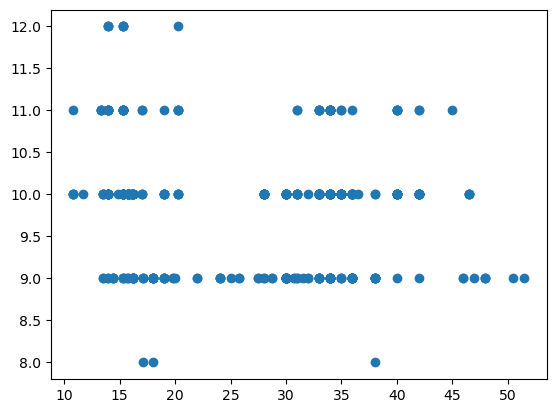

In [6]:
price = new_pumpkins.Price
month=new_pumpkins.Month
plt.scatter(price,month)


Text(0, 0.5, 'Pumpkin Price')

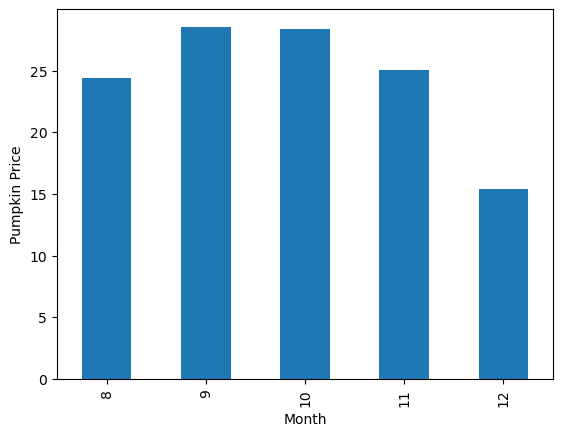

In [7]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')

Looking for correlation

In [27]:
print(new_pumpkins)
new_pumpkins.to_csv("new_pumpkins.csv",index=False)

      Month  DayOfYear    Variety       City               Package  Low Price  \
70        9        267   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      15.00   
71        9        267   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      18.00   
72       10        274   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      18.00   
73       10        274   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      17.00   
74       10        281   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      15.00   
...     ...        ...        ...        ...                   ...        ...   
1738      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      15.00   
1739      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      13.75   
1740      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      10.75   
1741      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      12.00   
1742      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      12.00   

      High Price  Price  
7

In [10]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14912913634278593
-0.1669009250593448


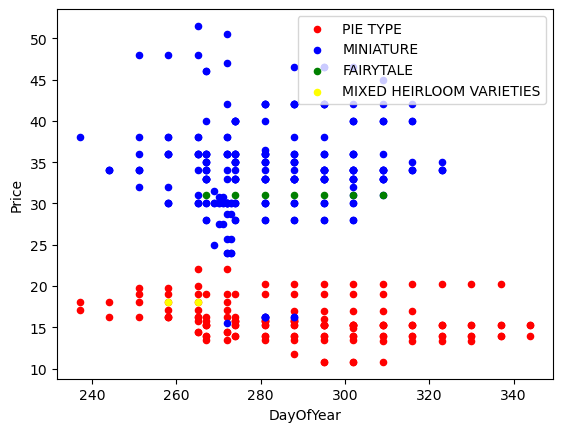

In [13]:
ax=None
colors=['red','blue','green','yellow']
for i ,var in enumerate(new_pumpkins['Variety'].unique()):
    df=new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)


pumpkinの種類ごとの価格に注目⇒差があり

<Axes: xlabel='Variety'>

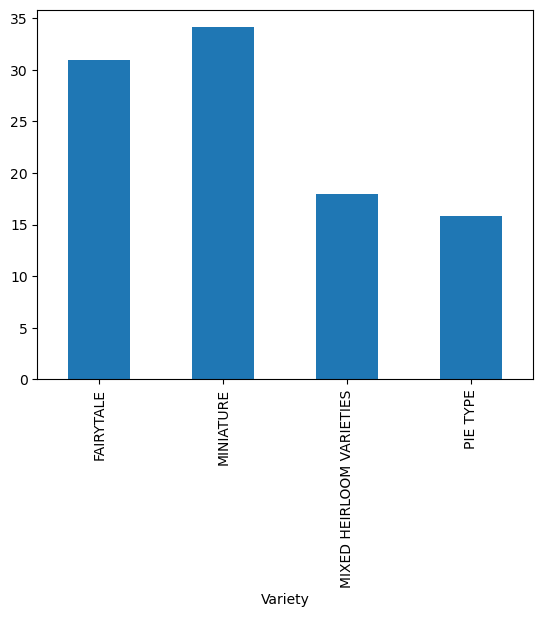

In [15]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

focus on pie_pumpkin(価格と日にちの関係から種類の影響を除去)

-0.26678559691441894


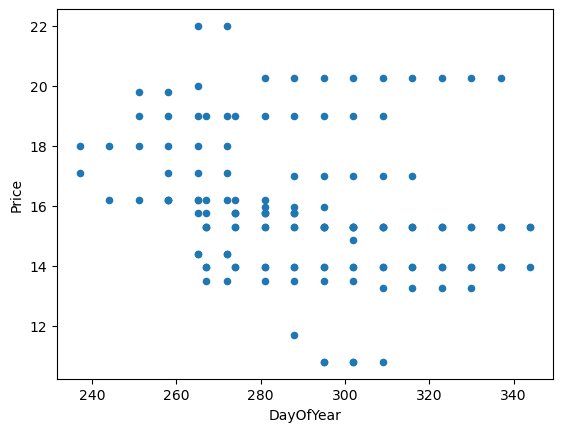

In [18]:
pie_pumpkins=new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price')
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))

In [26]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()
pie_pumpkins.to_csv("pie_pumpkins.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int64  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 10.1+ KB


/tmp/ipykernel_367351/3509347930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)
